<a href="https://colab.research.google.com/github/xVILENx/Dengue_SINAN/blob/main/graf_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

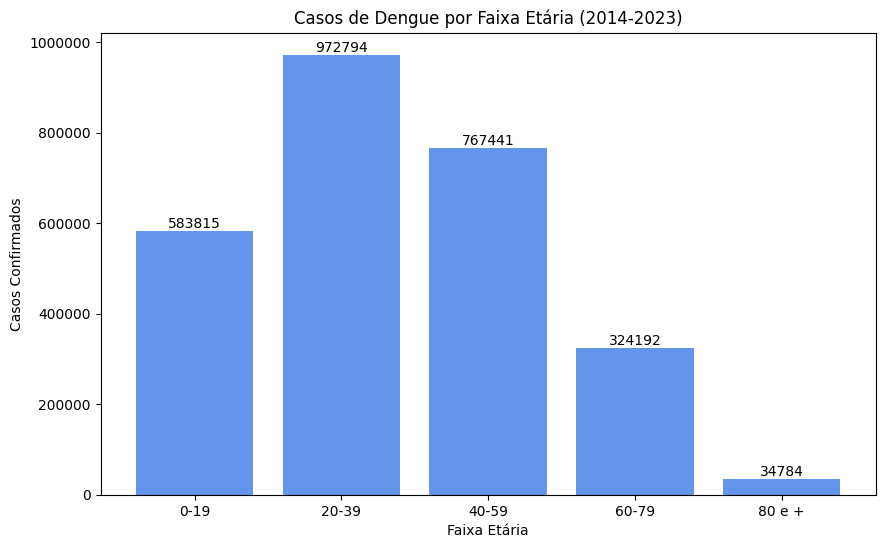

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gspread
from google.colab import auth
from google.auth import default

# Autenticar no Google
auth.authenticate_user()
creds, _ = default()

# Autorizar o acesso à planilha com as credenciais obtidas
gc = gspread.authorize(creds)

# Substitua com o ID da sua planilha do Google Sheets
spreadsheet_id = '1_9RDRSbd5Uo__vNQz5yKVoyumJtk7qTN_F3AVmLTEbs'

# Abrir a planilha usando o ID
spreadsheet = gc.open_by_key(spreadsheet_id)

# Ler a página "casos_simples"
worksheet = spreadsheet.worksheet('casos_simples')

# Extrair dados de faixa etária e casos confirmados
faixa_etaria = worksheet.row_values(1)[1:6]  # B1 até F1
casos_confirmados = worksheet.row_values(12)[1:6]  # B12 até F12

# Converter os casos confirmados para números inteiros
casos_confirmados = list(map(int, casos_confirmados))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(faixa_etaria, casos_confirmados, color='cornflowerblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Casos Confirmados')
plt.title('Casos de Dengue por Faixa Etária (2014-2023)')

# Configurar o formato dos rótulos do eixo y para exibir números inteiros
plt.ticklabel_format(style='plain', axis='y')

# Adicionar os valores no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()